# 課題（iLect上で提出してください）

## 機械学習の基礎（教師あり学習）¶

分析対象データとして、sklearnのdatasetsからload_iris(アヤメの花)を読み込んで、目的変数をiris.target、説明変数をiris.dataとして、決定木、ロジスティック回帰分析とk-NN(k=6で固定）、SVMのモデルを使って、予測と検証（学習データと検証データに分けます）を実施してください。これらの中で、一番正解率が高いモデルは何でしょうか。

提出するときは、以下の点に注意してください。  
>- 以下の関数homeworkの!!WRITE ME!!に処理を書いてください。(**「!!WRITE ME!!」は消して、記入してください。**)
>- 実際の提出は記述されたhomework関数全てになり、**提出場所はilect右上にある青字のHomeworkドロップダウンメニューからHomework 5を選んでください。Solutionに関数を貼り付けてからSaveを押してください。**  
>- 前処理は以下のコードを使って、これを引数としてください。今回は特に標準化等は実施していません。    
>- 学習データと検証データの分け方に違いが生じないように、 train_test_splitのrandom_stateは0にしています。  
>- 返り値は一番正解率が高いモデル名として、文字型にしてください。returnされる値は一つになるようにしてください。なお、モデル名ですが、model.\_\_class\_\_.\_\_name\_\_とすれば取得できます。  
(例)DecisionTreeClassifier　（返り値）

In [0]:
# common
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier

# データ分割
from sklearn.model_selection import train_test_split

#分析対象データ
from sklearn.datasets import load_iris

# data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

# initial value
best_score = 0
best_method = ""

In [0]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train).round(10))
print(model.score(X_test, y_test).round(10))

0.9553571429
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [0]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

#提出した解答

In [0]:
# working place. everything 
def homework(X_train, X_test, y_train, y_test,best_score,best_method):
    model_list=[
                LogisticRegression(),
                DecisionTreeClassifier(),
                LinearSVC() ,
                KNeighborsClassifier(n_neighbors=6),
                ]
    a = 0 #best_scoreとbest_methodを判断するために過学習の小さいものから選ぶ
    for i in model_list:
        model = i
        model.fit(X_train, y_train)
        D = abs(model.score(X_train, y_train) - model.score(X_test, y_test))
        if best_score == 0: #1番はじめ
            best_score = model.score(X_test, y_test)
            best_method = model.__class__.__name__
            a = D
        elif model.score(X_test, y_test) > best_score:
            best_score = model.score(X_test, y_test)
            best_method = model.__class__.__name__
            a = D
        elif model.score(X_test, y_test) == best_score:
            if D < a:
              a = D
              best_score = model.score(X_test, y_test)
              best_method = model.__class__.__name__
    my_result = best_method
    return my_result

In [3]:
homework(X_train, X_test, y_train, y_test,best_score,best_method)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'KNeighborsClassifier'

#解

In [0]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train, y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.973
正解率(test):0.933


In [0]:
# SVM
from sklearn.svm import LinearSVC
# データの読み込み
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# クラスの初期化と学習
model = LinearSVC(random_state=0, C=2) #kernel='rbf'を入れるとエラー
model.fit(X_train, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.987
正解率(test):0.907


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# 決定木
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):1.000
正解率(test):0.960


In [0]:
#k-NN(k=6で固定）
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.datasets import load_iris
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, random_state=0)

# 学習
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.964
正解率(test):1.000


In [0]:
# 決定木
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):1.000
正解率(test):0.960


変わるのはmodelだけ<br>ここをfor文で回す=>ベストパラメータを抽出<br>ベストパラメータをどのように決めるか

In [0]:
name = []
name = model.__class__.__name__
name = "tanuki"
name

'tanuki'

##for文を回す

In [0]:
#modelを回す
model_list=[
            LogisticRegression(),
            DecisionTreeClassifier(),
            LinearSVC() ,
            KNeighborsClassifier(n_neighbors=6),
            ]
a = 0
for i in model_list:
    model = i
    model.fit(X_train, y_train)
    D = abs(model.score(X_train, y_train) - model.score(X_test, y_test))
    if best_score == 0:
      a = D
      best_method = model.__class__.__name__
      best_score = model.score(X_test, y_test)
    elif model.score(X_test, y_test) > best_score:
      a = D
      best_method = model.__class__.__name__
      best_score = model.score(X_test, y_test)
    elif model.score(X_test, y_test) == best_score:
      if D < a:
        a = D
        best_method = model.__class__.__name__
    print('model:{}'.format(model.__class__.__name__))
    print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
    print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))
    print('Dif:{}'.format(D))
print('best_scoe:{}'.format(best_score))
print('best_method:{}'.format(best_method))
print('best_dif:{}'.format(a))

model:LogisticRegression
正解率(train):0.955
正解率(test):1.000
Dif:0.044642857142857095
model:DecisionTreeClassifier
正解率(train):1.000
正解率(test):0.974
Dif:0.02631578947368418
model:LinearSVC
正解率(train):0.955
正解率(test):0.974
Dif:0.018327067669172914
model:KNeighborsClassifier
正解率(train):0.964
正解率(test):1.000
Dif:0.0357142857142857
best_scoe:1.0
best_method:KNeighborsClassifier
best_dif:0.0357142857142857


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

#解答

In [0]:
# working place. everything 
def homework1(X_train, X_test, y_train, y_test,best_score,best_method):
    model_list=[
                LogisticRegression(),
                DecisionTreeClassifier(random_state=0),
                LinearSVC(random_state=0, C=2) ,
                KNeighborsClassifier(n_neighbors=6),
                ]
    a = 0 #best_scoreとbest_methodを判断するために過学習の小さいものから選ぶ
    for i in model_list:
        model = i
        model.fit(X_train, y_train)
        D = abs(model.score(X_train, y_train) - model.score(X_test, y_test))
        if a == False:
          a = D
          best_method = model.__class__.__name__
          best_score = model.score(X_test, y_test)
        elif D < a:
          a = D
          best_method = model.__class__.__name__
          best_score = model.score(X_test, y_test)
    my_result = best_method
    return my_result

In [0]:
homework2(X_train, X_test, y_train, y_test,best_score,best_method)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'KNeighborsClassifier'

#グリッドサーチでベストモデルとパラメータを探す

##使用するデータの項目を選ぶ：itertoolsで組み合わせを自動化できる

In [0]:
#分析対象データ
from sklearn.datasets import load_iris

# data
iris = load_iris()

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
import itertools

In [0]:
for i in range(len(iris.feature_names)):
  print(list(itertools.combinations(iris.feature_names, i)))

[()]
[('sepal length (cm)',), ('sepal width (cm)',), ('petal length (cm)',), ('petal width (cm)',)]
[('sepal length (cm)', 'sepal width (cm)'), ('sepal length (cm)', 'petal length (cm)'), ('sepal length (cm)', 'petal width (cm)'), ('sepal width (cm)', 'petal length (cm)'), ('sepal width (cm)', 'petal width (cm)'), ('petal length (cm)', 'petal width (cm)')]
[('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'), ('sepal length (cm)', 'sepal width (cm)', 'petal width (cm)'), ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)'), ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')]


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Loading dataset
import pandas as pd

path = "/content/gdrive/My Drive/Colab Notebooks/GCI2019/competition2/input/"

train = pd.read_csv(path +  'train.csv')
test = pd.read_csv(path +  'test.csv')

In [0]:
a_list=[]
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
print(a_list)

1 [('fixed acidity',), ('volatile acidity',), ('citric acid',), ('residual sugar',), ('chlorides',), ('free sulfur dioxide',), ('total sulfur dioxide',), ('density',), ('pH',), ('sulphates',), ('alcohol',)]
2 [('fixed acidity', 'volatile acidity'), ('fixed acidity', 'citric acid'), ('fixed acidity', 'residual sugar'), ('fixed acidity', 'chlorides'), ('fixed acidity', 'free sulfur dioxide'), ('fixed acidity', 'total sulfur dioxide'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('fixed acidity', 'sulphates'), ('fixed acidity', 'alcohol'), ('volatile acidity', 'citric acid'), ('volatile acidity', 'residual sugar'), ('volatile acidity', 'chlorides'), ('volatile acidity', 'free sulfur dioxide'), ('volatile acidity', 'total sulfur dioxide'), ('volatile acidity', 'density'), ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('volatile acidity', 'alcohol'), ('citric acid', 'residual sugar'), ('citric acid', 'chlorides'), ('citric acid', 'free sulfur dioxide'), ('citric 

In [0]:
for i in a_list:
  for j in i:
    x = train[list(j)]
    y = train['quality']

In [0]:
for i in a_list:
  for j in i:
    k_list=[]
    for k in j:
      k_list.append(k)
    print(k_list)

In [0]:
train['quality']

0       5.1
1       4.8
2       5.5
3       6.1
4       5.6
       ... 
1275    4.6
1276    4.4
1277    5.2
1278    5.1
1279    5.6
Name: quality, Length: 1280, dtype: float64

In [0]:
type(train[k_list])

pandas.core.frame.DataFrame

In [0]:
#説明変数の抽出
for i in a_list:
  for j in i:
    k_list=[]
    for k in j:
      k_list.append(k)
    x = train[k_list]
    print(type(x))

In [0]:
len(test.columns)

11

In [0]:
a_list[0][0][0]

'fixed acidity'

In [0]:
a_list[2][0][0]

('fixed acidity', 'volatile acidity', 'citric acid')

In [0]:
b_list=[]
for i in a_list:
  b_list.append(i)

In [0]:
a_list_arr = np.array(a_list)

In [0]:
b_list_arr = np.array(b_list)

In [0]:
b_list_arr[1]

In [0]:
a_list_arr

array([list([('fixed acidity',), ('volatile acidity',), ('citric acid',), ('residual sugar',), ('chlorides',), ('free sulfur dioxide',), ('total sulfur dioxide',), ('density',), ('pH',), ('sulphates',), ('alcohol',)]),
       list([('fixed acidity', 'volatile acidity'), ('fixed acidity', 'citric acid'), ('fixed acidity', 'residual sugar'), ('fixed acidity', 'chlorides'), ('fixed acidity', 'free sulfur dioxide'), ('fixed acidity', 'total sulfur dioxide'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('fixed acidity', 'sulphates'), ('fixed acidity', 'alcohol'), ('volatile acidity', 'citric acid'), ('volatile acidity', 'residual sugar'), ('volatile acidity', 'chlorides'), ('volatile acidity', 'free sulfur dioxide'), ('volatile acidity', 'total sulfur dioxide'), ('volatile acidity', 'density'), ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('volatile acidity', 'alcohol'), ('citric acid', 'residual sugar'), ('citric acid', 'chlorides'), ('citric acid', 'free sulfu

In [0]:
a[0][0]

'fixed acidity'

In [0]:
import numpy as np
a_arr = np.array(a)
a_arr.shape

(11, 10)

In [0]:
a_arr

In [0]:
 for i in a:
   print(i)

('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 're

In [0]:
import itertools

for v in itertools.combinations(test.columns, 10):
    print(v)
    #train2 = train[[ v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9] , 'quality']]
    #test2 = test[[v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9] ]]

    #addRow = pd.Series(best_mrm(train2,test2), index=MR.columns)
    #MR = MR.append(addRow, ignore_index=True)

('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
('fixed acidity', 'volatile acidity', 'citric acid', 're

##データ分割

In [0]:
#1:1, 7:3, 3:1, 4:1
test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, stratify = iris.target, test_size=size, random_state=0)

##モデル

###分類

In [0]:
model_list=[
            LogisticRegression(),
            DecisionTreeClassifier(random_state=0),
            LinearSVC(random_state=0, C=2) ,
            KNeighborsClassifier(n_neighbors=6),
            ]

In [0]:
for model in model_list:
    print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
KNeighborsClassif

###回帰

##パラメータ

In [0]:
params = []

In [0]:
import numpy as np

param_grid_randomforest = {
                           'max_depth'         : np.arange(2,6),
                           'min_samples_leaf'  : [1, 2, 4],
                           'n_estimators'      : [100],
                           'random_state'      : [1],
                           'n_jobs'            : [3],
                           'min_samples_split' : np.arange(8,12),
                            }

param_grid_xgboost = {
                      'max_depth': [2,4,6],
                      'n_estimators': [50,100,200]
                      }

param_grid_mlp = {
                  'hidden_layer_sizes': [10, (10, 10)],
                  'solver': ['sgd', 'adam', 'lbfgs'],
                  #'solver': ['lbfgs'],
                  #'activation': ['logistic', 'tanh', 'relu']
                  'activation': ['relu']
                  }

params.append(param_grid_randomforest)
params.append(param_grid_xgboost)
params.append(param_grid_mlp)

In [0]:
for param in params:
  print(param)

{'max_depth': array([2, 3, 4, 5]), 'min_samples_leaf': [1, 2, 4], 'n_estimators': [100], 'random_state': [1], 'n_jobs': [3], 'min_samples_split': array([ 8,  9, 10, 11])}
{'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
{'hidden_layer_sizes': [10, (10, 10)], 'solver': ['sgd', 'adam', 'lbfgs'], 'activation': ['relu']}


##全部

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
train['density']

0       0.9997
1       0.9941
2       0.9941
3       0.9907
4       0.9861
         ...  
1275    1.0043
1276    1.0066
1277    0.9936
1278    1.0017
1279    1.0092
Name: density, Length: 1280, dtype: float64

In [0]:
#Loading dataset
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

path = "/content/gdrive/My Drive/Colab Notebooks/GCI2019/competition2/input/"

train = pd.read_csv(path +  'train.csv')
test = pd.read_csv(path +  'test.csv')

density = pd.concat([train['density'], test['density']])
pH = pd.concat([train['pH'], test['pH']])

train['density'].fillna(density.mean(), inplace=True)
test['density'].fillna(density.mean(), inplace=True)

train['pH'].fillna(pH.mean(), inplace=True)
test['pH'].fillna(pH.mean(), inplace=True)

best_score = 0
best_size = 0
a_list=[]
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)

best_score = 0
best_factor = ""
best_size = 0
for i in a_list:
  for j in i:
    print('current check: ', j)
    x = train[list(j)]
    y = train['quality']

    test_size = [0.5, 0.3, 0.25, 0.2, 0.1]

    better_score = 0
    better_size = 0
    for size in test_size:
      X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=size, random_state=0)
      model = RandomForestRegressor()
      model.fit(X_train, y_train)
      pred = model.predict(X_test)
      if better_score == 0:
        better_score = mean_squared_error(y_test, pred)
        better_size = size
      elif mean_squared_error(y_test, pred) < better_score:
        better_score = mean_squared_error(y_test, pred)
        better_size = size
    print('better_size: ', better_size, 'better_score: ', better_score)
    best_score = better_score
    best_size = better_size
    best_factor = j
print('best_size: ', best_size, 'best_factor: ', best_factor, 'best_score: ', best_score)

current check:  ('fixed acidity',)
better_size:  0.1 better_score:  0.8214687914424864
current check:  ('volatile acidity',)
better_size:  0.1 better_score:  0.8182542875720185
current check:  ('citric acid',)
better_size:  0.1 better_score:  0.813120395280558
current check:  ('residual sugar',)
better_size:  0.1 better_score:  0.8142772948803396
current check:  ('chlorides',)
better_size:  0.25 better_score:  0.8419713525817276
current check:  ('free sulfur dioxide',)
better_size:  0.1 better_score:  0.9566479344833896
current check:  ('total sulfur dioxide',)
better_size:  0.25 better_score:  1.0706550307450513
current check:  ('density',)
better_size:  0.1 better_score:  1.0507932272973357
current check:  ('pH',)
better_size:  0.1 better_score:  0.8235105663149557
current check:  ('sulphates',)
better_size:  0.1 better_score:  0.7376125960929915
current check:  ('alcohol',)
better_size:  0.1 better_score:  0.6671689972405082
current check:  ('fixed acidity', 'volatile acidity')
bett

In [0]:
current_check =  ['citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']
better_size = 0.1 #better_score:  0.4752740703124998

In [0]:
x = train[current_check]
y = train['quality']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
      x, y, test_size=better_size, random_state=0)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

0.4927738828124998

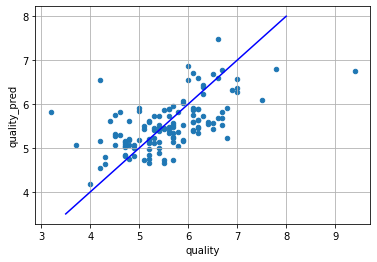

In [0]:
import matplotlib.pyplot as plt
#qualityと予測の散布図
X_conf_rfr = X_test.copy()
X_conf_rfr['quality'] = y_test
X_conf_rfr['quality_pred'] = pred
X_conf_rfr.plot.scatter(x='quality', y='quality_pred', grid=True)
plt.plot([3.5, 8], [3.5, 8], c="blue")  #直線の描画
plt.show()

In [0]:
X_val = test[current_check]

In [0]:
pred_val = model.predict(X_val)

In [0]:
#提出ファイルの保存
X_val['quality'] = pred_val
submission = pd.DataFrame(X_val['quality'])
path = "/content/gdrive/My Drive/Colab Notebooks/GCI2019/competition2/results/"
submission.to_csv(path + 'Submission_BF.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_val

,citric acid,total sulfur dioxide,sulphates,alcohol
0,0.49,134.4,1.00,9.7
1,0.49,121.7,0.77,10.7
2,0.39,46.0,0.61,10.5
3,0.33,52.6,0.63,12.3
4,0.46,24.7,0.79,10.2
...,...,...,...,...
314,0.35,57.6,1.39,10.3
315,0.61,96.4,0.54,9.1
316,0.03,34.7,0.56,10.1
317,0.12,126.3,0.48,10.4


In [0]:
import numpy as np
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# データ分割
from sklearn.model_selection import train_test_split

#分析対象データ
from sklearn.datasets import load_iris
# data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)
#1:1, 7:3, 3:1, 4:1
test_size = [0.5, 0.3, 0.25, 0.2, 0.1]

model_list=[
            LogisticRegression(),
            DecisionTreeClassifier(random_state=0),
            LinearSVC(random_state=0, C=2) ,
            KNeighborsClassifier(n_neighbors=6),
            ]
params = []

param_grid_randomforest = {
                           'max_depth'         : np.arange(2,6),
                           'min_samples_leaf'  : [1, 2, 4],
                           'n_estimators'      : [100],
                           'random_state'      : [1],
                           'n_jobs'            : [3],
                           'min_samples_split' : np.arange(8,12),
                            }

param_grid_xgboost = {
                      'max_depth': [2,4,6],
                      'n_estimators': [50,100,200]
                      }

param_grid_mlp = {
                  'hidden_layer_sizes': [10, (10, 10)],
                  'solver': ['sgd', 'adam', 'lbfgs'],
                  #'solver': ['lbfgs'],
                  #'activation': ['logistic', 'tanh', 'relu']
                  'activation': ['relu']
                  }

params.append(param_grid_randomforest)
params.append(param_grid_xgboost)
params.append(param_grid_mlp)

for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, stratify = iris.target, test_size=size, random_state=0)
    print('test_size: ',size)
    for model in model_list:
        model = model
        print('model: ',model)
        for param in params:
            print('parameter: ',param)

test_size:  0.5
model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
parameter:  {'max_depth': array([2, 3, 4, 5]), 'min_samples_leaf': [1, 2, 4], 'n_estimators': [100], 'random_state': [1], 'n_jobs': [3], 'min_samples_split': array([ 8,  9, 10, 11])}
parameter:  {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
parameter:  {'hidden_layer_sizes': [10, (10, 10)], 'solver': ['sgd', 'adam', 'lbfgs'], 'activation': ['relu']}
model:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sam